# Project - 10 Agriculture Dataset Project

About The Project:-

Most important field in any part of the world is agriculture. Food is must for every living thing on the earth and for human
it is mostly come from farming,ut a farmer's job is real test of endurance and determination. Once the seeds are sown,he works
days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several 
factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other 
useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides
is something the farmer can control.I will use machine learning technique to build the model which will predict the outcome of
the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

About The dataset:-

The dataset consist of many features like ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category
Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage. I will use classification technique to predict the
crop damage catrgory.
Here are the unique feature present in the dataset:-

1. ID -> Unique ID
2. Estimated_Insects_Count -> Estimated Insect Count per squaremeter
3. Crop_Type -> Category of crop (0,1)
4. Soil_Type -> Category of Soil(0,1)
5. Pesticide_Use_Category -> Type of presticides uses (1=Never,2=Previously used,3=Currently using)
6. Number_Doses_Week -> Number of doses per week
7. Number_Weeks_Used -> Number of weeks used
8. Number_Weeks_Quit -> Number of weeks quit
9. Season -> Season Category(1,2,3)
10.Crop_Damage -> Crop damage Category (0=alive,1=Damaage due to other causes,2=Damage due to presticides)

After observing dataset i found that most label are present in the dataset so i will use classification techniques to predict
the target variable which is Crop_Damage.

In [119]:
#Importing some important library
import pandas as pd

In [120]:
#Importing the dataset into dataframe df for furthure working
df = pd.read_csv("train_agriculture.csv")
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [121]:
#Checking the datatypes of the columns present in the dataset
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

# Exploratory Data Analysis

In [122]:
#This will give the shape of the data
df.shape

(4599, 10)

In [123]:
#This will give the information of dataset like not null columns,count and also datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


As per above observation we can see that there 4599 null values present in the dataset in all columns accept of column 
Number_Weeks_Used as there are 4157 values present so it seems there is missing value present in the dataset.

In [124]:
#Checking the missing values present in the dataset and there counts columnwise by this method
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [125]:
#Treating and missing values by taking average of the column variable
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(), inplace=True)

In [126]:
#Checking again if missing values present in the dataset
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [127]:
#This will give all columns present in the dataset with full name
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [128]:
#Checkin the unique values present in the target column
df['Crop_Damage'].unique()

array([0, 1, 2], dtype=int64)

In [129]:
#Checkin the how many values present in the each of label in the target columns
df['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

# Summary Statistic

In [130]:
#This will give the stastical information of dataset like mean,STD,max,min etc. I will use the information populated.
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Key Observation:-

1. We can see that there is 4599 values vailable across all columns so we can say that there is no missing value present in the
   dataset.
    
2. Standard deviation is very high in the column Estimated_Insects_Counts so data in this columns is spread and range is high.

3. STD is also high in columns Number_Does_Week,Number_Does_Used and Number_Weeks_Quit so range is high also in these 
   columns and data is not normally distributed in thses columns.
    
4. Mean is higher than median across all columns accept of Season. It means skewness is present in these columns and columns
   are right skewed or +e skewed.
    
5. In season column median  is high than mean so it is left skewed or negative skewed.

6. Difference between min and max is high in most of the column which shows high range and spreadness of data.

7. Difference between 75 percentile and max is high in columns like Estimated_Insects_Count ,Number_Does_Week,Number_Does_Used
   Number_Weeks_Quit . So by this observation we can say that there is outliers present in these columns which will we confirm
   after plotting boxplot.
   

# Data Visulization

In [131]:
#Importing some important library to see data in visulization form and finding some observation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

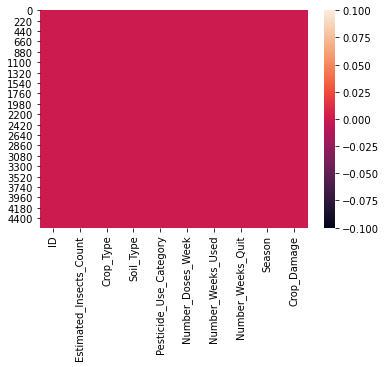

In [132]:
#Checking the missing value present in the dataset by plotting graph which make sure that there is no missing value present
sns.heatmap(df.isnull())

In [133]:
#Checking the corelation of other variables with our target variables
dfcor = df.corr()
dfcor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


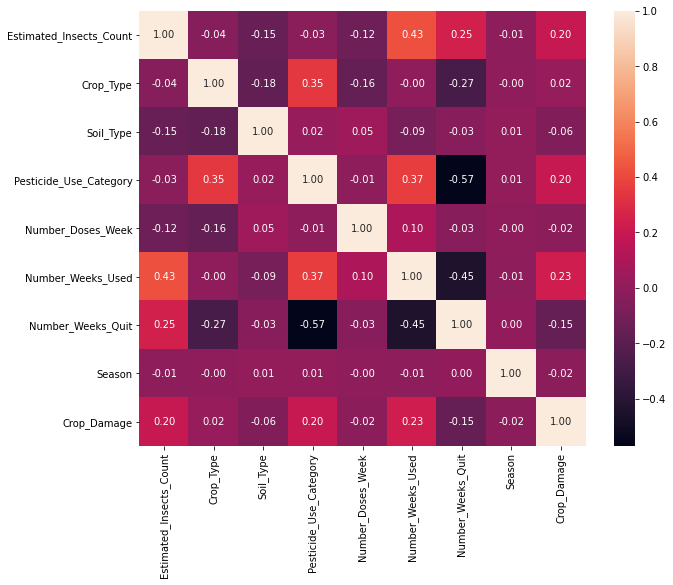

In [134]:
#See tge corelation in heatmap for better visulization
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,annot=True ,fmt='.2f')

Observation:-
    
By plotting corelation heatmap we can see that the how other columns is corelated with our target column Crop_Damage_. Below
are the insights i get from above corelation heatmap.->

1.The columns Estimated_Insects_Counts_ ,Pesticide_Use_Category , Numbers_Weeks_Used,Crop_Type are postive colrelation columns
  with my target varible.
    
2.Soil_Type , Number_Doses_Week,Number_Weeks_Quit and Season are negative corelated with the target varible.

3.Highest +ve corelated column = Number_Weeks_Used

4.Highest -ve corelated column = Number_Weeks_Quit

All columns are participating in corelation with target variables and both -ve and +ve corelation exist.

Text(0.5, 1.0, 'Corelation With target variables')

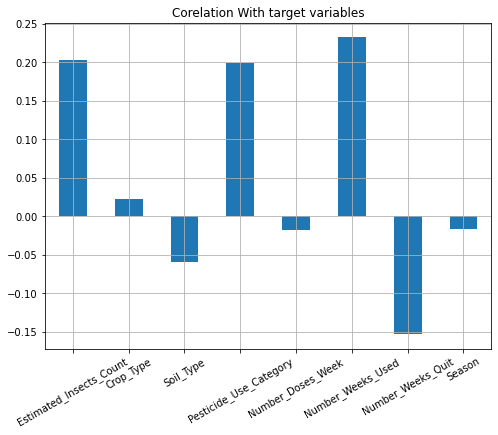

In [135]:
#The other way to check corelation and understand the relation with target column in better way
plt.figure(figsize=(8,6))
df.drop('Crop_Damage',axis=1).corrwith(df['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation=30)
plt.title('Corelation With target variables')

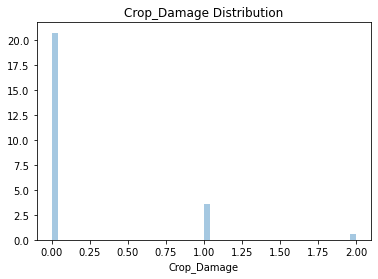

In [136]:
#Checking how my target variable distributed
sns.distplot(df['Crop_Damage'])
plt.title("Crop_Damage Distribution")
plt.show()

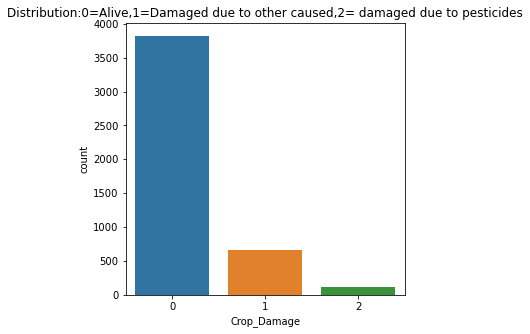

In [137]:
#Checking count of my target varibles
plt.figure(figsize=(5,5))
sns.countplot(df['Crop_Damage'])
plt.title("Distribution:0=Alive,1=Damaged due to other caused,2= damaged due to pesticides")

plt.show()

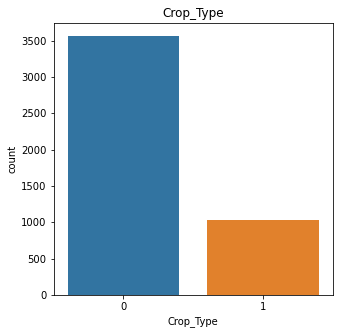

In [138]:
#Checking count of crop type
plt.figure(figsize=(5,5))
sns.countplot(df['Crop_Type'])
plt.title("Crop_Type")

plt.show()

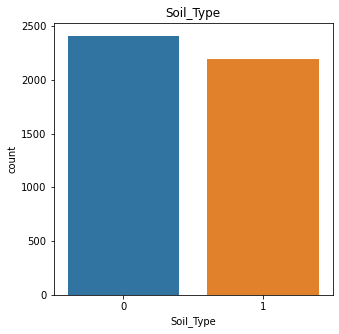

In [139]:
#Checking Count of Soil_Type
plt.figure(figsize=(5,5))
sns.countplot(df['Soil_Type'])
plt.title("Soil_Type")

plt.show()

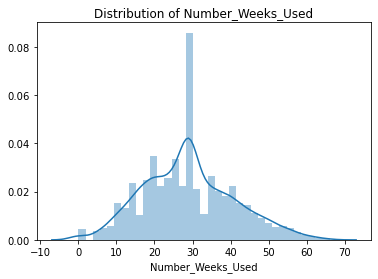

In [140]:
#Distribution of Number_Weeks_Used
sns.distplot(df['Number_Weeks_Used'])
plt.title("Distribution of Number_Weeks_Used")
plt.show()

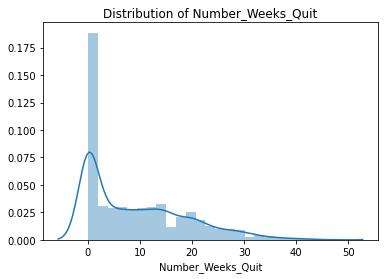

In [141]:
#Distribution of Number_Weeks_Quit
sns.distplot(df['Number_Weeks_Quit'])
plt.title("Distribution of Number_Weeks_Quit")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

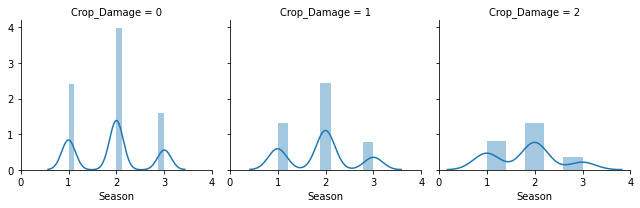

In [142]:
#Checking the distribution of each crop damaged type
facet =sns.FacetGrid(df,col="Crop_Damage")
facet.map(sns.distplot,"Season")
plt.show

Here from above observatin we can see the Crop_damage season wise. The Crop is survived and alive high in season 2 then 1 and
in season 3 it is very less. Crop damaged by other cause is high in season 2 and then season 1 and lowest in season 3. Crop
damaged by pesticides is high in season 2 then season 1 and lowest in season 1.

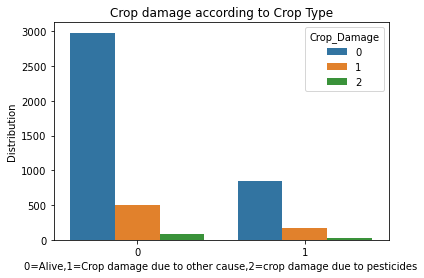

Crop_Type  Crop_Damage
0          0              2979
           1               498
           2                88
1          0               841
           1               166
           2                27
Name: Crop_Damage, dtype: int64


In [143]:
sns.countplot(x="Crop_Type",hue="Crop_Damage",data=df)
plt.title("Crop damage according to Crop Type")
plt.xlabel("0=Alive,1=Crop damage due to other cause,2=crop damage due to pesticides")
plt.ylabel("Distribution")
plt.show()

print(df.groupby('Crop_Type')['Crop_Damage'].value_counts())

As per above observation one answer we can find:-
    
In Crop_Type 0 ->
Maximum values are present of crop is alive with 2979 values.
Then crop damage due to other reason with values 498 values.
Least crop damage due to pesticides with values 88 values.

So by above observation i can say that on the basis of this dataset when coil type is 0 there are maximum chance that crop will
not damaged due to any reason.

In Crop_Type 1 ->
Maximum values are present of crop is alive with 841 values.
Then crop damage due to other reason with values 166 values.
Least crop damage due to pesticides with values 27 values.

So in crop type 1 there is less data present as compare to crop type 0. But the same result here also in coil type 1 the chance of crop is alive higher than it will damage due to other reason and then damage due to pesticides.

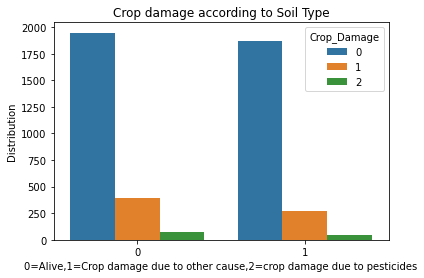

Soil_Type  Crop_Damage
0          0              1947
           1               390
           2                70
1          0              1873
           1               274
           2                45
Name: Crop_Damage, dtype: int64


In [144]:
sns.countplot(x="Soil_Type",hue="Crop_Damage",data=df)
plt.title("Crop damage according to Soil Type")
plt.xlabel("0=Alive,1=Crop damage due to other cause,2=crop damage due to pesticides")
plt.ylabel("Distribution")
plt.show()

print(df.groupby('Soil_Type')['Crop_Damage'].value_counts())

As per above observation we can see that there is two types of soil present in the dataset.

Soil_Type 0 ->
in this soil type we can see that there are 1947 times the crop is alive and then 390 values present when crop is damaged
due to other cause whereas 70 values present when crop is damage due to pesticides.So we can see that there is maximum values
present in the dataset for soil type in the case when the crop is alive as compare to damage.

Soil_Type 1:-
In this soil type the crop is alive 1873 times and damaged due to other cause 274 times and then damage due to pesticides
45 times. So we can see that the same like soil type 1 the crop is alive maximum time when soil type 1.


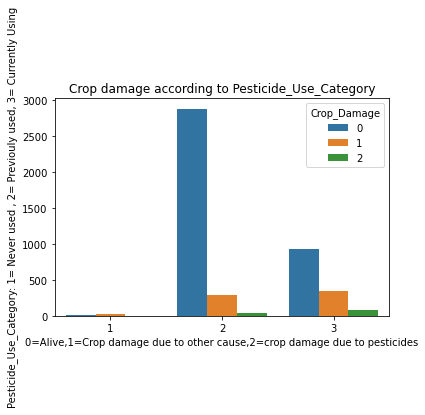

Pesticide_Use_Category  Crop_Damage
1                       1                33
                        0                 7
                        2                 5
2                       0              2881
                        1               290
                        2                34
3                       0               932
                        1               341
                        2                76
Name: Crop_Damage, dtype: int64


In [145]:
#Crop damage vs Pesticide_Use_category
sns.countplot(x="Pesticide_Use_Category",hue="Crop_Damage",data=df)
plt.title("Crop damage according to Pesticide_Use_Category")
plt.xlabel("0=Alive,1=Crop damage due to other cause,2=crop damage due to pesticides")
plt.ylabel("Pesticide_Use_Category: 1= Never used , 2= Previouly used, 3= Currently Using")
plt.show()

print(df.groupby('Pesticide_Use_Category')['Crop_Damage'].value_counts())

Here from above observation we can see that there are 3 category in Pesticide_Use_Category.

Pesticide_Use_Category (1=Never used)->
So in the scenerio where pesticide never used we can see that the crop damage due to other cause with 33 values.Then the crop
is alive 7 times and damage due to pesticide 5 times.So we can easily see that no use of pesticide is not good option as maximum
time the crop is damaged.

Pesticide_Use_Category (2=Previously used)->
In the scenerio when pesticide used previouly we can see that there is maximum chances to survive the crop as here crop is alive
2881 times and then crop is damage due to other cause 290 times and then crop is damage due to pesticide is very less 34 times
only. So this is best option to use pesticide here we can see that.

Pesticide_Use_Category (3=Currently Using)->
In this scenerio we can see that from above observation there is maximum scenerios when crop is alive which is 932 times. Then
crop damage due to other cause 341 times and the crop is damaged due to pesticide is 76 times.So in this option also the chances
to survival of crop is very good.

By observing all scenerios I can say that the chance to crop survive we must use pesticide.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B480903A60>,
      dtype=object)

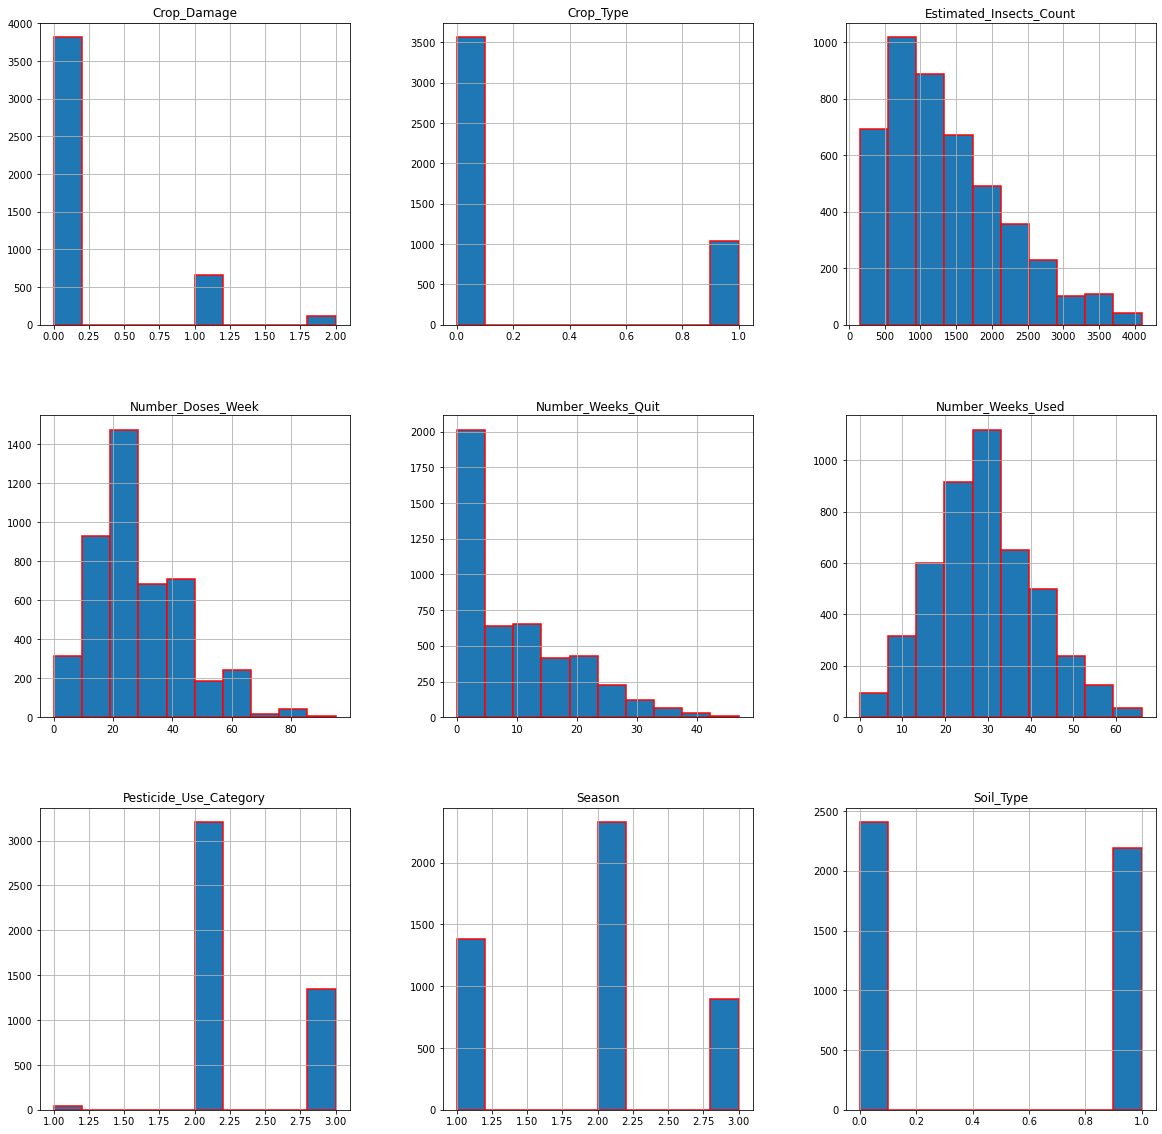

In [146]:
#Checking the distribution of all columns by plotting histogram
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))   


In [147]:
#Checking skewness
df.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

As per above observation we can see that there is skewness is present in columns like Estimated_Insects_Count,Crop_Type
Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit. 

In [148]:
#Droping columns ID as it is not good useful and impactful for model building
df.drop(['ID'],axis=1,inplace=True)
df.sample()#Checking the sample data

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
1040,1385,0,0,2,40,28.0,8,1,0


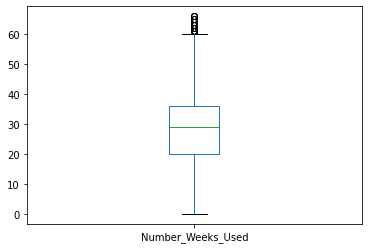

In [149]:
#Plotting Outliers
df['Number_Weeks_Used'].plot.box()

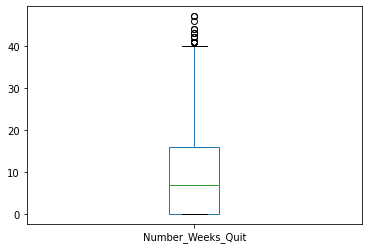

In [150]:
#Plotting Outliers
df['Number_Weeks_Quit'].plot.box()

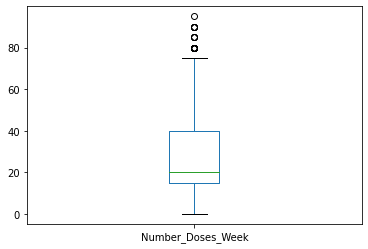

In [151]:
#Plotting Outliers
df['Number_Doses_Week'].plot.box()

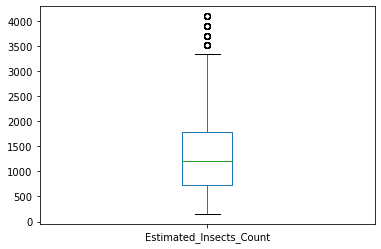

In [152]:
#Plotting Outliers
df['Estimated_Insects_Count'].plot.box()

In [153]:
#Outliers detection by zscore method
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold =3
new_df = df[(z<3).all(axis=1)]
new_df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.000000,0,1,0
1,209,1,0,1,0,0.000000,0,2,1
2,257,1,0,1,0,0.000000,0,2,1
3,257,1,1,1,0,0.000000,0,2,1
4,342,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.891027,1,1,1
4595,2139,0,1,2,30,47.000000,2,1,1
4596,2267,0,1,2,10,7.000000,27,2,0
4597,2267,0,1,2,10,20.000000,24,2,0


In [154]:
df['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [155]:
df.shape

(4599, 9)

In [156]:
#Percentage Loss of data after removing outliers
percentage_loss=((4599-4370)/4599)*100
percentage_loss

4.979343335507719

In [157]:
#IQR Method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Estimated_Insects_Count    1055.0
Crop_Type                     0.0
Soil_Type                     1.0
Pesticide_Use_Category        1.0
Number_Doses_Week            25.0
Number_Weeks_Used            16.0
Number_Weeks_Quit            16.0
Season                        1.0
Crop_Damage                   0.0
dtype: float64


In [158]:
df_new1 = df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)

(2872, 9)


In [159]:
#Seprating independent and target variable
x= df.drop("Crop_Damage",axis=1)
y= df["Crop_Damage"] #Target variable

In [160]:
#Checking shape of my data after splitting
print("x shape: ",x.shape," ","Y shape: ",y.shape)

x shape:  (4599, 8)   Y shape:  (4599,)


In [161]:
#Reshaping y values
y = y.values.reshape(-1,1)
y.shape

(4599, 1)

# Model Building

In [162]:
#Finding best random state

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25,random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = accuracy_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        
        
        
print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")
    

Best Accuracy 85.04347826086956 found on random_state 94


In [163]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = 94,stratify=y )

In [164]:
#Importing some important model library
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [165]:
#Using gridsearchcv to find out the best parameters in KNeighborsClassifier
parameters = {'n_neighbors':range(22,25)}
knn = KNeighborsClassifier()

clf = GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 22}


In [166]:
#Models with its best parameters
KNN=KNeighborsClassifier(n_neighbors=22)
SVC=SVC()

In [167]:
#All algorithm by using for loop
model = [SVC,DecisionTreeClassifier(),KNN,MultinomialNB()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy Score Of ",m,"is :")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("**************************************************************************************************************")
    print('\n')
    
    

Accuracy Score Of  SVC() is :
0.8304347826086956
[[764   0   0]
 [133   0   0]
 [ 23   0   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       764
           1       0.00      0.00      0.00       133
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.28      0.33      0.30       920
weighted avg       0.69      0.83      0.75       920

**************************************************************************************************************


Accuracy Score Of  DecisionTreeClassifier() is :
0.741304347826087
[[642 108  14]
 [ 89  38   6]
 [ 15   6   2]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       764
           1       0.25      0.29      0.27       133
           2       0.09      0.09      0.09        23

    accuracy                           0.74       920
   macro avg       0.40   

In [168]:
#Cross validate the models
models = [SVC,DecisionTreeClassifier(),KNN,MultinomialNB()]
for m in models:
    score = cross_val_score(m,x,y,cv=10,scoring="accuracy")
    print("model:",m)
    print("score",score)
    print("mean score:",score.mean())
    print("standard deviation:",score.std())
    print("***************************************************************************************************************")
    print('\n')


model: SVC()
score [0.83043478 0.83043478 0.83043478 0.83043478 0.83043478 0.83043478
 0.83043478 0.83043478 0.83043478 0.83224401]
mean score: 0.8306157052192857
standard deviation: 0.0005427678317703854
***************************************************************************************************************


model: DecisionTreeClassifier()
score [0.58913043 0.73695652 0.65869565 0.71521739 0.64565217 0.69565217
 0.58043478 0.72608696 0.72391304 0.74074074]
mean score: 0.6812479871175523
standard deviation: 0.0567976101376777
***************************************************************************************************************


model: KNeighborsClassifier(n_neighbors=22)
score [0.81956522 0.8326087  0.82608696 0.83695652 0.82608696 0.8326087
 0.83043478 0.84347826 0.80869565 0.83224401]
mean score: 0.8288765747845032
standard deviation: 0.009108538898074779
***************************************************************************************************************


From above all observation I found that SVC giving best score with accuracy score of 83.04% at the same time cross_val_score is
83.06%. Now i will use some boosting technique to boostup the score and then i will deside that which i will select and save.

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [170]:
#using for loop working with all algorithm at one time
model = [RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy Score Of ",m,"is :")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("************************************************************************************************************")
    print('\n')
    
    

Accuracy Score Of  RandomForestClassifier() is :
0.8260869565217391
[[742  21   1]
 [113  18   2]
 [ 20   3   0]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       764
           1       0.43      0.14      0.21       133
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.43      0.37      0.37       920
weighted avg       0.77      0.83      0.78       920

************************************************************************************************************


Accuracy Score Of  AdaBoostClassifier() is :
0.8326086956521739
[[757   7   0]
 [124   9   0]
 [ 19   4   0]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       764
           1       0.45      0.07      0.12       133
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg

In [171]:
#Cross validate the models
models = [RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in models:
    score = cross_val_score(m,x,y,cv=10,scoring="accuracy")
    print("model:",m)
    print("score",score)
    print("mean score:",score.mean())
    print("standard deviation:",score.std())
    print("*****************************************************************************************************")
    print('\n')


model: RandomForestClassifier()
score [0.70217391 0.80652174 0.7826087  0.83043478 0.74782609 0.80869565
 0.66304348 0.83043478 0.77391304 0.83006536]
mean score: 0.7775717533390167
standard deviation: 0.05465939891398552
*****************************************************************************************************


model: AdaBoostClassifier()
score [0.73695652 0.8326087  0.82391304 0.83043478 0.8326087  0.85652174
 0.7326087  0.8326087  0.8326087  0.83224401]
mean score: 0.8143113573931988
standard deviation: 0.0405631845523296
*****************************************************************************************************


model: GradientBoostingClassifier()
score [0.72173913 0.82391304 0.78478261 0.83478261 0.75652174 0.83913043
 0.76304348 0.83043478 0.77608696 0.83442266]
mean score: 0.7964857440560765
standard deviation: 0.0393508067080935
*****************************************************************************************************


model: BaggingClassifier

After using all techniques i found that the ther are two models are working well with both accuracy_score and cross_val_score
and minimu diffrence between both scores. Models are  = Support vector classifier(SVC) and Random Forest classifier.

SVC:- 
Accuracy_Score = 0.8304347826086956
cross_val_score = 0.8306157052192857
difference =    0.00018092261059010628 

ABC:-
Accuracy_Score = 0.8326086956521739
cross_val_score = 0.8143113573931988
difference = 0.01829733825897506

I will use Adaboost Classifier() as the difference between accuracy score and cross val score is lower than the diffrence
in Support vector classifier.Also Ada Boost classifier as it is encoaded model also minimize the chances of underfiting
and overfiting.

In [108]:
#Hyperparameter Tuning by using GridSearchCV to find best parameters so my model performs at his best
from sklearn.ensemble import AdaBoostClassifier
parameters = {'n_estimators': [100,200,300],'algorithm':['SAMME', 'SAMME.R']}
abc = AdaBoostClassifier()
clf = GridSearchCV(abc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'algorithm': 'SAMME', 'n_estimators': 300}


In [174]:
#using the finded parameters creating and testing the model
abc = AdaBoostClassifier(n_estimators=300,algorithm='SAMME')
abc.fit(x_train,y_train)
abc.score(x_train,y_train)
predabc= abc.predict(x_test)
print(accuracy_score(y_test,predabc)*100)
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))


83.36956521739131
[[759   5   0]
 [125   8   0]
 [ 21   2   0]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       764
           1       0.53      0.06      0.11       133
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.46      0.35      0.34       920
weighted avg       0.77      0.83      0.77       920



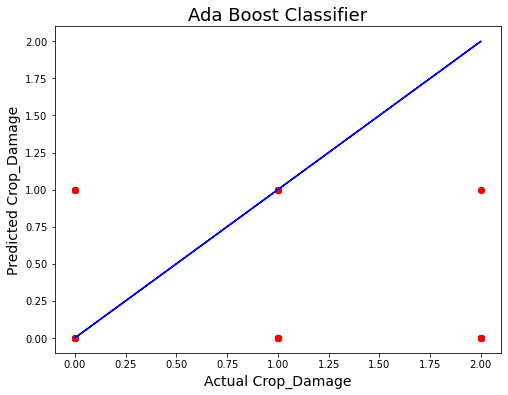

In [175]:
#Plotting figure to see the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predabc,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Crop_Damage",fontsize = 14)
plt.ylabel("Predicted Crop_Damage",fontsize =14)
plt.title('Ada Boost Classifier',fontsize=18)
plt.show()

# Model Saving

In [176]:
#Model Saving with best model RandomForestRegressor
import joblib 

joblib.dump(abc,'abcfile.obj')

['abcfile.obj']

In [179]:
#Loading to see my model
abc_from_joblib = joblib.load('abcfile.obj')
abc_from_joblib

AdaBoostClassifier(algorithm='SAMME', n_estimators=300)

In [67]:
#Loading the test dataset
test_agriculture = pd.read_csv("test_agriculture.csv")
test_agriculture.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [68]:
#Droping unwanted columns
test_agriculture.drop(['ID'],axis=1,inplace=True)
test_agriculture.sample()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
248,2402,0,1,3,10,58.0,0,1


In [69]:
#Checking missing value
test_agriculture.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [70]:
#Treating and missing values by taking average of the column variable
test_agriculture['Number_Weeks_Used'].fillna(test_agriculture['Number_Weeks_Used'].mean(), inplace=True)

In [71]:
#Checking missing value again
test_agriculture.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [180]:
test_agriculture_predict=abc_from_joblib.predict(test_agriculture)
test_agriculture_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [181]:
# Saving The predictions in csv file
import numpy as np
import pandas as pd
Prediction= pd.DataFrame(test_agriculture_predict, columns=['Crop_Damage_Predictions']).to_csv('Agriculture_Prediction.csv')

# END OF PROJECT